<center>&nbsp;<br>
<font size="12" >🌳 Parcours des arbres binaires </font><br></center>

## <span style="color:blue; background : #00FFFF">I. Retour sur les structures de données abstraites.</span>

### <span style="color:navy"> 1. les différentes structures déjà étudiées </span>

Nous avons déjà étudié beaucoup de structures de données abstraites. Quelles techniques avons-nous pour en parcourir les éléments?
- ***Pour le type abstrait liste :***

Réponse : enlever la tête

- ***Pour le type abstrait file :*** 

Réponse : défiler

- ***Pour le type abstrait pile :***

Réponse : dépiler

 - ***Pour le type abstrait dictionnaire :***

Réponse : clé 

- ***Pour le type `list` de python :***

Réponse : index

### <span style="color:navy">2. Arbre binaire</span>

Un arbre binaire est une structure permettant de stocker une collection de données de même type. **Ce n'est pas une structure linéaire.**    
Le principal avantage des arbres par rapport aux listes est qu’ils permettent de ranger les données de telle sorte que les recherches soient plus efficace.  
Pour accéder à un élément quelconque d’un arbre , il faut "descendre" dans l’arbre jusqu’à cet élément.

Certaines données ont naturellement une structure d'arbre binaire. C'est le cas d'un arbre généalogique ascendant (recherche du père et de la mère).
  

De façon plus conforme à la théorie des arbres, nous aurions pu représenter cet arbre en plaçant la racine en haut.

- Un ***parcours en largeur*** nous permettra de parcourir successivement toutes les personnes d'une même génération.
- Un ***parcours en profondeur*** nous permettra de parcourir l'arbre "par branche". Nous allons préciser tout cela.

# 🤔
## <span style="color:blue; background : #00FFFF"> II. Différents parcours possibles des arbres </span>  🏃‍♂️ 

Cette année, nous allons étudier le parcours en largeur et le parcours en profondeur

### <span style="color:navy">1. Parcours en largeur (Ce parcours est parfois noté BFS pour Breadth-First Search) </span>

Le parcours en largeur correspond à un parcours par niveau de noeuds de l'arbre. Un niveau est un ensemble de
noeuds ou de feuilles situés à la même profondeur.

***Méthode :*** On note chaque sommet niveau par niveau en commençant par la gauche.

Nous allons utiliser l'implémentation des arbres binaires suivante, déjà étudiée.

In [4]:
class Arbre:
    def __init__(self, val):
        self.valeur = val
        self.gauche = None
        self.droit = None

    def ajout_gauche(self,val):
        self.gauche = Arbre(val)

    def ajout_droit(self,val):
        self.droit = Arbre(val)


La structure est la suivante :  **un arbre est représenté par sa racine**, et il possède un sous arbre-gauche et un sous-arbre droit (éventuellement vides : None) représentés eux aussi par leur racine.

Pour étudier cet algorithme de parcours en largeur, nous allons utiliser une file.  
Quel est le principe d'une file ?

Réponse : First in first out

Nous avons déjà vu plusieurs implémentations possibles des files, nous allons utiliser celle de Python : le module Queue

#### Extrait de la documentation en français de python  sur le module Queue qui est une implémentation des files.   
([https://docs.python.org/fr/3.7/index.html])  
  
Les objets Queue (Queue, LifoQueue ou PriorityQueue) fournissent les méthodes publiques décrites ci-dessous.

**Queue.qsize()**   
Renvoie la taille approximative de la file. Notez que qsize() > 0 ne garantit pas qu'un get() ultérieur ne sera pas bloquant et que qsize() < maxsize ne garantit pas non plus qu'un put() ne sera pas bloquant.
  
**Queue.empty()**  
Renvoie True si la file est vide, False sinon. Si empty() renvoie True, cela ne garantit pas qu'un appel ultérieur à put() ne sera pas bloquant. Similairement, si empty() renvoie False, cela ne garantit pas qu'un appel ultérieur à get() ne sera pas bloquant.  
  
**Queue.full()**  
Renvoie True si la file est pleine, False sinon. Si full() renvoie``True``, cela ne garantit pas qu'un appel ultérieur à get() ne sera pas bloquant. Similairement, si full() retourne False, cela ne garantit pas qu'un appel ultérieur à put() ne sera pas bloquant.  
  
**Queue.put(item, block=True, timeout=None)**  
Met item dans la file. Si les arguments optionnels block et timeout sont respectivement True et None (les valeurs par défaut), la méthode bloque si nécessaire jusqu'à ce qu'un emplacement libre soit disponible. Si timeout est un nombre positif, elle bloque au plus timeout secondes et lève l'exception Full s'il n'y avait pas d'emplacement libre pendant cette période de temps. Sinon (block est False), elle met un élément dans la file s'il y a un emplacement libre immédiatement disponible. Si ce n'est pas le cas, elle lève l'exception Full (timeout est ignoré dans ce cas).  
    
**Queue.get(block=True, timeout=None)**  
Retire et renvoie un élément de la file. Si les arguments optionnels block et timeout valent respectivement True et None (les valeurs par défaut), la méthode bloque si nécessaire jusqu'à ce qu'un élément soit disponible. Si timeout est un entier positif, elle bloque au plus timeout secondes et lève l'exception Empty s'il n'y avait pas d'élément disponible pendant cette période de temps. Sinon (block vaut False), elle renvoie un élément s'il y en a un immédiatement disponible. Si ce n'est pas le cas, elle lève l'exception Empty (timeout est ignoré dans ce cas).  


**Expérimentons ce module avec le premier exemple ci-dessous :**

In [7]:
from queue import *
f = Queue()
f.put(1)
f.put(2)
f.put(3)
print("taille de la file : ", f.qsize())
print("on defile")
print("on peut récuperer ce qui a ete defile")
enleve=f.get()
print("element retire : ", enleve)
print("taille de la file : ", f.qsize())
f.get()
print("on defile")
print("taille de la file : ", f.qsize())

taille de la file :  3
on defile
on peut récuperer ce qui a ete defile
element retire :  1
taille de la file :  2
on defile
taille de la file :  1


**Un peu plus compliqué :** Nous allons mettre des arbres dans une file, et pas seulement des entiers.  
Observons l'exemple suivant :

In [8]:
# Implementation de arbre1
arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")

# On crer la file f, puis on met arbre1 dedans
f = Queue()
f.put(arbre1)


Quelle est la taille de la file f ?

In [ ]:
Réponse : 1

Vérifions ci dessous

In [9]:
# compléter le code pour afficher la taille de f
print("la liste a une taille de:",f.qsize())

la liste a une taille de: 1


**Explication :** la file ne contient qu'un seul élément de type arbre binaire (`arbre1`) dont la racine est `"A"`.  
Nous allons maintenant ajouter deux autres éléments à cette file : le sous-arbre gauche, et le sous-arbre droit de la racine.  
Complétez le code ci-dessous

In [10]:
# Compléter le code pour ajouter le sous arbre gauche de la racine à la file f, et faire afficher la taille de la file.
f.put(arbre1.gauche)
print("la liste a une taille de:",f.qsize())

la liste a une taille de: 2


Pour "voir" ce que contient notre file, nous allons défiler tous les éléments, et les afficher à chaque fois.  
Compléter le code ci-dessous. Vous ne  programmerrez pas les "défilages" un par un, mais utiliserez obligatoirement une boucle `while`  qui teste si la file est vide  
Indication : pour afficher un arbre (représenté souvenons-nous par sa racine), vous pouvez utiliser l'attibut `valeur`.

In [5]:
# Compléter le code ci-dessous
while not f.empty():
    value = f.get()
    print(value.valeur)
    

A
B


![pseudocode.jpg](attachment:pseudocode.jpg)

Faire tourner à la main cet algorithme sur l'exemple de : `arbre1`.  
Compléter le tableau ci-dessous en utilisant une ligne par tour de boucle `while`.   
La première ligne correspond à l'instruction : enfiler arbre dans f.  
On convient d'écrire les éléments d'une file avec la tête à droite. On enfile donc par la gauche, et on défile par la droite.
Pour compléter le tableau, il suffit de double-cliquer sur la cellule.

| Affichage | f    |  
| :---------| :--- | 
|           | A    | 
| A         | CB   | 
| B         | EDC  |
| C         | FED  | 
| D         | GFE  | 
| E         | GF   | 
| F         | G    | 
| G         | vide | 


En utilisant le pseudo-code fourni, compléter ci-dessous la fonction `parcours_largeur(arbre)`, puis exécuter ce script.

In [8]:
from queue import *

class Arbre:
    def __init__(self, val):
        self.valeur = val
        self.gauche = None
        self.droit = None

    def ajout_gauche(self,val):
        self.gauche = Arbre(val)

    def ajout_droit(self,val):
        self.droit = Arbre(val)


def parcours_largeur(arbre):
    """
    parcours_largeur(arbre) renvoie la liste des noeuds tels qu'ils sont apparus dans ce parcours
    Par exemple pour 
    arbre = Arbre("A")
    arbre.ajout_gauche("B")
    arbre.ajout_droit("C")
    la fonction doit renvoyer ['A', 'B', 'C']
    """
    f = Queue()
    f.put(arbre)
    lst = []
    while not f.empty():
        a = f.get()
        lst += [a.valeur]
        if a.gauche != None:
            f.put(a.gauche)
        if a.droit != None:
            f.put(a.droit)
    return lst


arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")
print(parcours_largeur(arbre1))



['A', 'B', 'C', 'D', 'E', 'F', 'G']


Nous avons bien réalisé un parcours en largeur de notre arbre.

**<span style="background-color:yellow">A retenir : 
Le parcours d'un arbre en largeur est un algorithme itératif (boucle while) utilisant une file**</span>


### <span style="color:navy">2. Les différents parcours en profondeur (pafois notés DFS pour Depth-First Search)</span>

#### a) Première définition des trois parcours : A partir de ce contour, on définit trois parcours des sommets de l’arbre :  
1. l’ordre préfixe : on liste chaque sommet la première fois qu’on le rencontre dans la balade.   
Chaque noeud est visité avant que ses deux fils le soient.  
On part de la racine, on visite le fils gauche, puis le fils droit  


2. l’ordre suffixe (aussi appelé postfixe en anglais) : on liste chaque sommet la dernière fois qu’on le rencontre.   
Chaque noeud est visité après que ses deux fils le soient.  
On visite le fils gauche, puis le fils droit, puis la racine  

3. l’ordre infixe (plus compliqué!): chaque noeud est visité (listé) après son fils gauche mais avant son fils droit. Si c'est une feuille il est donc listé (sont fils gauche et son fils droit sont vides)  
On visite le fils gauche, puis la racine, puis le fils droit

Ces trois parcours sont naturellement **récursifs.**

On peut ainsi considérer qu’on passe une fois à gauche de chaque noeud (en descendant), une fois en dessous
de chaque noeud, une fois à droite de chaque noeud (en remontant).
Vérifier, sur l’exemple, que chacun des ordres préfixe, infixe, postfixe est obtenu en listant tous les mots :  


1. Ordre préfixe : lorsque l'on passe à gauche des noeuds   
👉 Regarder cette vidéo : [ordre préfixe](https://www.youtube.com/watch?v=sWRfjcNdsno&feature=youtu.be)  
Cela donne ici : r,a,c,h,d,i,j,l,b,e,k,f

2. Ordre suffixe : lorsque l'on passe à droite des noeuds  
👉 Regarder cette vidéo : [ordre suffixe](https://www.youtube.com/watch?v=x5sha6aQ3pE&feature=youtu.be)  
Cela donne ici : h,c,i,l,j,d,a,k,e,f,h,r

3. Ordre infixe : lorsque l'on passe sous les noeuds   
👉 Regarder cette vidéo : [ordre infixe](https://www.youtube.com/watch?v=MzQr47Kl95Q&feature=youtu.be)  
Cela donne ici : c,h,a,i,d,l,i,r,k,e,h,f

### <span style="color:navy">3. Expérimentons ces trois parcours dans le cas concret d'un labyrinthe </span>

Voici un labyrinthe :<center>

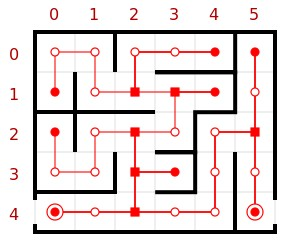
</center>

Les cercle vides sont des noeuds sans intersection, les cercles pleins sont des culs de sac, les carrés sont des intersections, l'entrée et la sortie sont marquées par un cercle plein dans un cercle vide.

Ce labyrinthe est parfait :  chaque cellule est reliée à toutes les autres et, ce, de manière unique 

Contrairement au labyrinthe étudié dans le cours sur les graphe, celui-ci peut donc être représenté par un arbre (il n'y a pas de cycle)

**a. Faire la représentation de ce labyrinthe avec  un arbre (sur feuille).**  
- Pour nommer un nœud, il a été choisi de donner en premier le numéro de la colonne, et en deuxième le numéro de la ligne.  Le nœud d'entrée est donc le (0,4) et celui de sortie le (5,4).  
- On part du nœud (0,4) qui sera la racine de cet arbre. Lorsqu'il n'y a qu'un fils, **on convient de le placer obligatoirement à gauche**, et lorsqu'il y a une intersection, placez bien entendu à gauche le nœud quand on va vers la gauche et à droite quand on va à droite.  
- Pour simplifier, on notera 04 à la place (0, 4), 14 à la place de (1, 4) etc...


***Dessin à faire sur votre feuille***



**b. Quelle est la hauteur de l'arbre ?**

Réponse : 

**c. Quelle est la profondeur du nœud (5,4) ? Qu'est-ce que cette profondeur représente dans notre problème ?**   
  Réponse :


- Quel est le parcours qui donne le chemin le plus court pour trouver la sortie? 

Réponse : 

- Aurions-nous pu trouver un chemin plus rapide?

Réponse : 

# 💡

La structure d'arbre n'est pas adaptée à la recherche de chemins, ou de plus court chemin. Nous verrons plus tard comment résoudre ce problème avec des parcours de graphe.

### <span style="color:navy">4. Le parcours préfixe </span>

On donne le pseudo-code suivant :

fonction parcours_prefixe(arbre) :
      si arbre ≠ None :
      affiche arbre.valeur
      parcours_prefixe(arbre.gauche)
      parcours_prefixe(arbre.droit)

Compléter le code suivant, et le tester pour `arbre1`.  
Vérifier à la main, en utilisant la technique du 2.  que le résultat est bien correct.

In [5]:
def parcours_prefixe(arbre):
    if arbre != None:
        print(arbre.valeur)
        parcours_prefixe(arbre.gauche)
        parcours_prefixe(arbre.droit)


arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")
print(parcours_prefixe(arbre1))

A
B
D
G
E
C
F
None


#  💡
La solution ci-dessous donne un affichage plus élaboré, grâce à l'ajout du apramètre `n` qui permet de réaliser des indentations dans l'affichage.

In [6]:
def parcours_prefixe(arbre,n=0):
    if arbre != None:
        print("   "*n,'--',arbre.valeur)
        parcours_prefixe(arbre.gauche,n+1)
        parcours_prefixe(arbre.droit,n+1)


arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")
print(parcours_prefixe(arbre1))


 -- A
    -- B
       -- D
          -- G
       -- E
    -- C
       -- F
None


**<span style="background-color:yellow">A retenir :   
préfixe : RGD (racine, sous-arbre gauche, sous-arbre droit)  
Racine en 1er</span>**

# 🤔
#### Pour approfondir, regardons la vidéo suivante :
👉 [Parcours préfixe](https://www.youtube.com/watch?v=YUKTRVlYrbs&feature=youtu.be)

### <span style="color:navy"> 5. Le parcours suffixe </span>

On donne le pseudo-code suivant :

fonction parcours_suffixe(arbre) :
      si arbre ≠ None :
      parcours_prefixe(arbre.gauche)
      parcours_prefixe(arbre.droit)
      affiche arbre.valeur
 

Compléter le code suivant, et le tester pour arbre1.
Vérifier à la main, en utilisant la technique du 2. que le résultat est bien correct.

In [ ]:
def parcours_suffixe(arbre):
    if arbre != None:
        parcours_prefixe(arbre.gauche)
        parcours_prefixe(arbre.droit)
        return arbre.valeur


arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")
print(parcours_suffixe(arbre1))

#  💡
La solution ci-dessous donne un affichage plus élaboré, grâce à l'ajout du apramètre `n` qui permet de réaliser des indentations dans l'affichage.

In [9]:
def parcours_suffixe(arbre,n=0):
    if arbre != None:
        parcours_suffixe(arbre.gauche,n+1)
        parcours_suffixe(arbre.droit,n+1)
        print("   "*n,"---",arbre.valeur)


arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")
print(parcours_suffixe(arbre1))

          --- G
       --- D
       --- E
    --- B
       --- F
    --- C
 --- A
None


**<span style="background-color:yellow">A retenir :   
suffixe : GDR (sous-arbre gauche, sous-arbre droit, racine)  
Racine en dernier</span>**

### <span style="color:navy">6. Le parcours infixe </span>

On donne le pseudo-code suivant :

fonction parcours_infixe(arbre) :
      si arbre ≠ None :
      parcours_infixe(arbre.gauche)
      affiche arbre.valeur
      parcours_infixe(arbre.droit)
      

Compléter le code suivant, et le tester pour arbre1.
Vérifier à la main, en utilisant la technique du 2. que le résultat est bien correct.

In [11]:
def parcours_infixe(arbre):
    if arbre != None:
        parcours_infixe(arbre.gauche)
        print(arbre.valeur
        parcours_infixe(arbre.droit)

arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")
parcours_infixe(arbre1)

D
G
B
E
A
F
C


#  💡
La solution ci-dessous donne un affichage plus élaboré, grâce à l'ajout du apramètre `n` qui permet de réaliser des indentations dans l'affichage.

In [12]:
def parcours_infixe(arbre,n=0):

    if arbre != None:
        parcours_infixe(arbre.gauche,n+1)
        print("   "*n,"---",arbre.valeur)
        parcours_infixe(arbre.droit,n+1)
arbre1 = Arbre("A")
arbre1.ajout_gauche("B")
arbre1.ajout_droit("C")
arbre1.gauche.ajout_gauche("D")
arbre1.gauche.ajout_droit("E")
arbre1.gauche.gauche.ajout_droit("G")
arbre1.droit.ajout_gauche("F")
parcours_infixe(arbre1)

       --- D
          --- G
    --- B
       --- E
 --- A
       --- F
    --- C


**<span style="background-color:yellow">A retenir :   
infixe : GRD (sous-arbre gauche, racine, sous-arbre droit)  
Racine au milieu</span>**

# 🤔
#### Pour approfondir, regardons la vidéo suivante :  
👉 [Parcours infixe](https://www.youtube.com/watch?v=D2xwk2f4WRo&feature=youtu.be)

# ❓❓❓
###  <span style="color:navy">7. Quel parcours choisir ?</span>

Nous avons vu que le parcours en largeur était pertinent pour avoir des renseignements plutôt par niveau, utile par exemple si on veut connaître les personnes d'une même génération.  
Le parcours préfixe, parcourt l'arbre en profondeur plutôt de manière descendante, et le suffixe plutôt de manière ascendante.  
Quel est lintérêt du parcours infixe ?  
Nous allons voir cela dans le paragraphe suivant. 😀

### <span style="color:navy">8. Parcours infixe sur un arbre binaire de recherche.</span>

**Le tri du bijoutier**  (d'après : [Apmep](https://www.apmep.fr/IMG/pdf/AAA10028.pdf))  

Considérons le problème du bijoutier voulant trier par grosseur un tas de diamants :
pour faire cette opération il se sert d’un tamis ce qui lui permet de séparer le tas initial
en deux, et il recommence avec de nouveaux tamis pour chaque tas. On le comprend
facilement l’efficacité du tri est fonction des trames des tamis utilisés.  
Nous allons utiliser une idée similaire pour créer un arbre binaire, et pour construire les
algorithmes permettant de le parcourir.  
Mieux qu’un grand discours montrons la construction de l’arbre correspondant aux données  7, 3, 1, 8, 6.  
Nous allons placer le premier élément 7 à la racine d'un arbre.  
Principe du tamis : **pour n'mporte quel noeud**, tous les noeuds se trouvant dans son sous-arbre gauche ont une valeur inférieure, et tous ceux se trouvant dans le sous arbre droit ont une valeur supérieure. Le sous arbre gauche correspond à ce qui est passé dans les trous du tamis, et le sous-arbre droit à ce qui est resté dans le tamis.  
- 3 < 7 donc  3 est fils gauche de 7  
- 1 < 3 donc 1 est fils gauche de 3  
- 8 > 7 donc 8 est fils droit de 7. (on ne peut pas mettre 8 comme fils droit de 3, car sinon 8 serait dans le sous-arbre gauche de 7, ce qui est impossible car ce sous-arbre ne doit contenir que des nombres inférieurs à 7).  
-  6 > 3 et 6 < 7 donc 6  est fils droit de 3.

  
On obtient l'arbre suivant :

In [30]:
# Supprimer le # de la ligne suivante si vous travaillez sur Colaboratory
!pip install binarytree
from binarytree import Node

# Créer un arbre
arbre = Node(7)
arbre.left = Node(3)
arbre.left.left = Node(1)
arbre.right = Node(8)
arbre.left.right = Node(6)


print(arbre)

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'binarytree'

Nous venons de crée un ***arbre binaire de recherche***
Nous reviendrons plus tard  en détail sur cette structure de données.

Reprenons cet exemple et implémentons le avec la classe Arbre du début.  
Compléter ci-dessous

In [14]:
class Arbre:
    def __init__(self, val):
        self.valeur = val
        self.gauche = None
        self.droit = None

    def ajout_gauche(self,val):
        self.gauche = Arbre(val)

    def ajout_droit(self,val):
        self.droit = Arbre(val)
        
# Compléter ci-dessous
abr = Arbre(7)



Appliquons maintenant le parcours infixe à `abr`

In [16]:
def parcours_infixe(arbre):

    if arbre != None:
        parcours_infixe(arbre.gauche)
        print(arbre.valeur)
        parcours_infixe(arbre.droit)
        
parcours_infixe(abr)

7


On constate que l'on obtient les noeuds triés.  
# 😃
**<span style="background-color:yellow">Le parcours infixe sur un arbre binaire de recherche trie les noeuds de cet arbre.</span>**
  
C'est un des très grands intérêts des arbres binaires de recheche, et du parcours infixe.

***Auteurs : Mireille COILHAC et Valérie MOUSSEAUX et Jean-Louis THIROT***    
Ce document est sous licence Creative Commons  Attribution - Pas d’Utilisation Commerciale - 
Partage dans les Mêmes Conditions 4.0 International.  
[lien vers la licence](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.fr)  
Sources :  
Manuel NSI : Numériques et sciences informatiques, auteur Serge Bays, collection prépas sciences, ellipses  
Irem de Lyon